In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:

import os
dataset = '/gdrive/MyDrive/IML_DATASETS/Dataset-2/data'
Data_dir = os.listdir(dataset)
print(Data_dir)

['without_mask', 'with_mask']


In [ ]:
%ls /gdrive/MyDrive/IML_DATASETS/Dataset-2/data/with_mask/

In [ ]:
learning_rate = 1e-4
EPOCHS = 20
BATCH_SIZE = 32

In [ ]:

data = []
labels = []

for category in Data_dir:
  folder_path = os.path.join(dataset, category)
  for img in os.listdir(folder_path):
    img_path = os.path.join(folder_path, img)
    try:
      image = load_img(img_path, target_size=(224, 224))
      image = img_to_array(image)
      image = preprocess_input(image)
      # update the data and labels lists, respectively
      data.append(image)
      labels.append(category)
    except Exception as e:
      print("No image found : Exception: ", e)

In [ ]:
	# image = load_img(imagePath, target_size=(224, 224))
	# image = img_to_array(image)
	# image = preprocess_input(image)
	# # update the data and labels lists, respectively
	# data.append(image)
	# labels.append(label)


In [ ]:
print(len(data),len(labels))
print(data[0].shape)
# plt.imshow(data[700],cmap='g')

1376 1376
(224, 224, 3)


In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

In [ ]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
trX = np.array(trainX)
trY = np.array(trainY)
trX.shape,trY.shape

((1100, 224, 224, 3), (1100, 2))

In [ ]:
testX,testY = np.array(testX),np.array(testY)

In [ ]:

#adding our custom model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel) #using the functional api instead of the sequential api

model = Model(inputs=baseModel.input, outputs=headModel)
for layer in baseModel.layers:#freezing layers to retain the weights 
	layer.trainable = False

In [ ]:
# compile our model
model.compile(loss="binary_crossentropy", optimizer=Adam(lr=learning_rate, decay=learning_rate/EPOCHS),metrics=["accuracy"])
trained_custom_model = model.fit(trX,trY, epochs=EPOCHS, validation_split=0.1)


Epoch 1/20
31/31 [==============================] - 34s 1s/step - loss: 0.3829 - accuracy: 0.8404 - val_loss: 0.1262 - val_accuracy: 0.9909
Epoch 2/20
31/31 [==============================] - 34s 1s/step - loss: 0.1152 - accuracy: 0.9707 - val_loss: 0.0622 - val_accuracy: 0.9909
Epoch 3/20
31/31 [==============================] - 34s 1s/step - loss: 0.0714 - accuracy: 0.9848 - val_loss: 0.0411 - val_accuracy: 0.9909
Epoch 4/20
31/31 [==============================] - 34s 1s/step - loss: 0.0451 - accuracy: 0.9869 - val_loss: 0.0298 - val_accuracy: 1.0000
Epoch 5/20
31/31 [==============================] - 34s 1s/step - loss: 0.0340 - accuracy: 0.9909 - val_loss: 0.0248 - val_accuracy: 1.0000
Epoch 6/20
31/31 [==============================] - 34s 1s/step - loss: 0.0277 - accuracy: 0.9949 - val_loss: 0.0218 - val_accuracy: 1.0000
Epoch 7/20
31/31 [==============================] - 34s 1s/step - loss: 0.0273 - accuracy: 0.9909 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 8/20
31/31 [==

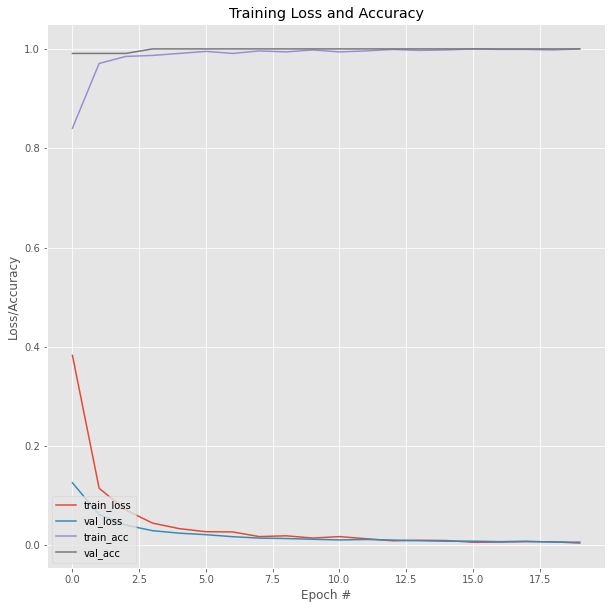

In [ ]:

plt.style.use("ggplot")
plt.figure(figsize=(10,10))
plt.plot(np.arange(0, EPOCHS), trained_custom_model.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), trained_custom_model.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), trained_custom_model.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), trained_custom_model.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")


In [ ]:
print('hello')

hello


In [ ]:
model.save("face_mask_model.h5")

In [ ]:
import cv2


In [ ]:
###Face detection part

In [ ]:

# load the input image and construct an input blob for the image
# by resizing to a fixed 300x300 pixels and then normalizing it
image = cv2.imread('/gdrive/MyDrive/IML_DATASETS/Dataset-2/data/with_mask/0-with-mask.jpg')
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,(300, 300), (104.0, 177.0, 123.0))

In [ ]:
baseModel.setInput

In [ ]:
for i in range(0, detections.shape[2]):
	# extract the confidence (i.e., probability) associated with
	# the detection
	confidence = detections[0, 0, i, 2]
	# filter out weak detections by ensuring the confidence is
	# greater than the minimum confidence
	if confidence > 0.6:
		# compute the (x, y)-coordinates of the bounding box for
		# the object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
		# ensure the bounding boxes fall within the dimensions of
		# the frame
		(startX, startY) = (max(0, startX), max(0, startY))
		(endX, endY) = (min(w - 1, endX), min(h - 1, endY))

In [ ]:
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import plot_confusion_matrix as plot_conf
import itertools
import matplotlib.pyplot as plt


In [ ]:
y_pred = model.predict(testX)
from sklearn.metrics import accuracy_score
rounded_predictions = np.argmax(y_pred,axis=-1)

y_test = np.argmax(testY,axis=-1)
print(rounded_predictions[:15],y_test[:15])


[1 0 1 0 1 1 0 1 0 1 1 1 0 0 1] [0 0 1 0 1 1 0 1 0 1 1 1 0 0 1]


In [ ]:
from sklearn.metrics import confusion_matrix 

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=rounded_predictions)

In [ ]:
cm

array([[137,   1],
       [  0, 138]])

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.inferno):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[137   1]
 [  0 138]]


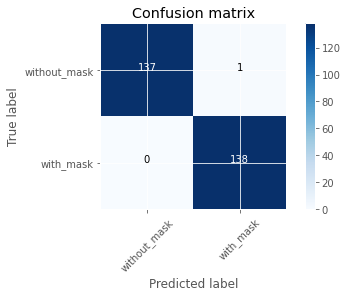

In [ ]:
plot_confusion_matrix(cm,['without_mask','with_mask'])

In [ ]:
for i in range(1000000000):
  j = i*i

In [ ]:
trainX = np.array(trainX)
trainY = np.array(trainY)
trainX.shape,trainY.shape

((1100, 224, 224, 3), (1100, 2))

In [ ]:
testX,testY = np.array(testX),np.array(testY)

In [ ]:
trainX = trainX.reshape(trainX.shape[0],trainX.shape[3],trainX.shape[2]*trainX.shape[1])

In [ ]:
trainX = trainX.reshape(trainX.shape[0],trainX.shape[1]*trainX.shape[2])

In [ ]:
trainX.shape

(1100, 150528)

In [ ]:
train_Y = np.argmax(trainY,axis=-1)


In [ ]:
train_Y.shape

(1100,)

In [ ]:
from sklearn import svm

In [ ]:
classifier = svm.SVC(gamma=0.001)


In [ ]:
classifier.fit(trainX,train_Y)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
testX = testX.reshape(testX.shape[0],testX.shape[1]*testX.shape[2]*testX.shape[3])

In [ ]:
y_pred = classifier.predict(testX)
# rounded_predictions = np.argmax(y_pred,axis=-1)

y_test = np.argmax(testY,axis=-1)
print(y_pred[:15],y_test[:15])

[0 0 1 0 0 0 1 0 0 0 0 1 0 0 1] [0 0 1 0 1 1 0 1 0 1 1 1 0 0 1]


In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [ ]:
cm

array([[135,   3],
       [ 99,  39]])

Confusion matrix, without normalization
[[135   3]
 [ 99  39]]


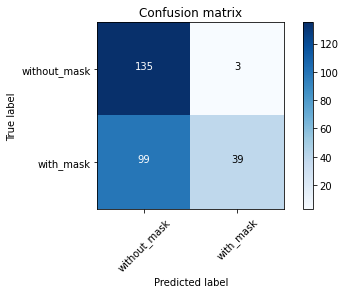

In [ ]:
plot_confusion_matrix(cm,['without_mask','with_mask'])

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

In [ ]:
precision_recall_fscore_support(y_true=y_test, y_pred=y_pred)

(array([0.57692308, 0.92857143]),
 array([0.97826087, 0.2826087 ]),
 array([0.72580645, 0.43333333]),
 array([138, 138]))

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.58      0.98      0.73       138
           1       0.93      0.28      0.43       138

    accuracy                           0.63       276
   macro avg       0.75      0.63      0.58       276
weighted avg       0.75      0.63      0.58       276



In [ ]:
from tensorflow.keras.applications import  EfficientNetB0

In [ ]:
basemodel2  = EfficientNetB0(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

16711680/16705208 [==============================] - 2s 0us/step


In [ ]:

#adding our custom model
headModel = basemodel2.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel) #using the functional api instead of the sequential api

model2 = Model(inputs=basemodel2.input, outputs=headModel)
for layer in basemodel2.layers:#freezing layers to retain the weights 
	layer.trainable = False

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)
trainX = np.array(trainX)
trainY = np.array(trainY)
testX = np.array(testX)
testY = np.array(testY)

In [ ]:
model2.compile(loss="binary_crossentropy", optimizer=Adam(lr=0.00001, decay=0.00001/20),metrics=["accuracy"])
trained_custom_model = model2.fit(trainX,trainY, epochs=20, validation_split=0.1)

Epoch 1/20
31/31 [==============================] - 59s 2s/step - loss: 0.6952 - accuracy: 0.5202 - val_loss: 0.6953 - val_accuracy: 0.4909
Epoch 2/20
31/31 [==============================] - 59s 2s/step - loss: 0.7021 - accuracy: 0.4707 - val_loss: 0.6938 - val_accuracy: 0.4909
Epoch 3/20
31/31 [==============================] - 59s 2s/step - loss: 0.6973 - accuracy: 0.4717 - val_loss: 0.6934 - val_accuracy: 0.4909
Epoch 4/20
31/31 [==============================] - 59s 2s/step - loss: 0.7007 - accuracy: 0.5061 - val_loss: 0.6931 - val_accuracy: 0.4909
Epoch 5/20
31/31 [==============================] - 59s 2s/step - loss: 0.6948 - accuracy: 0.5192 - val_loss: 0.6931 - val_accuracy: 0.4909
Epoch 6/20
31/31 [==============================] - 59s 2s/step - loss: 0.6939 - accuracy: 0.5263 - val_loss: 0.6928 - val_accuracy: 0.5273
Epoch 7/20
31/31 [==============================] - 59s 2s/step - loss: 0.6965 - accuracy: 0.4788 - val_loss: 0.6927 - val_accuracy: 0.6091
Epoch 8/20
31/31 [==

In [ ]:
!pip install visualkeras

In [ ]:
import visualkeras  

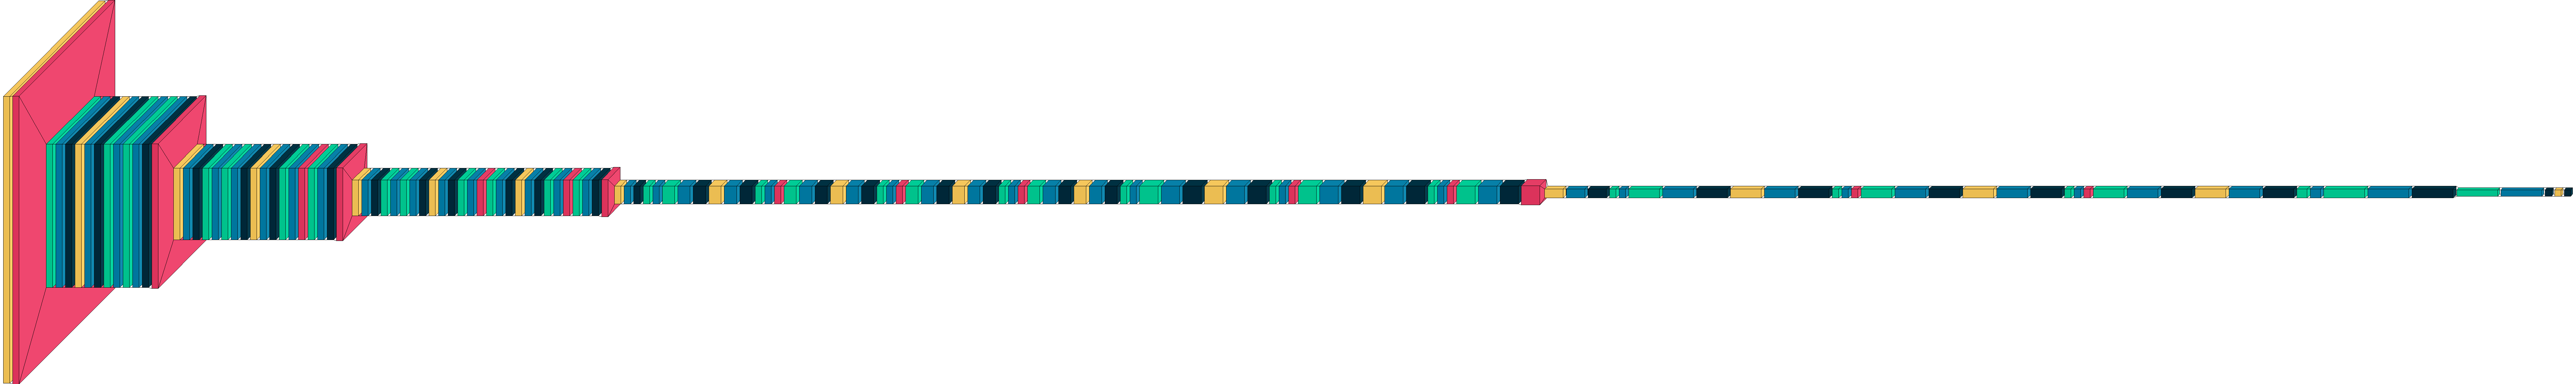

In [ ]:
visualkeras.layered_view(model)

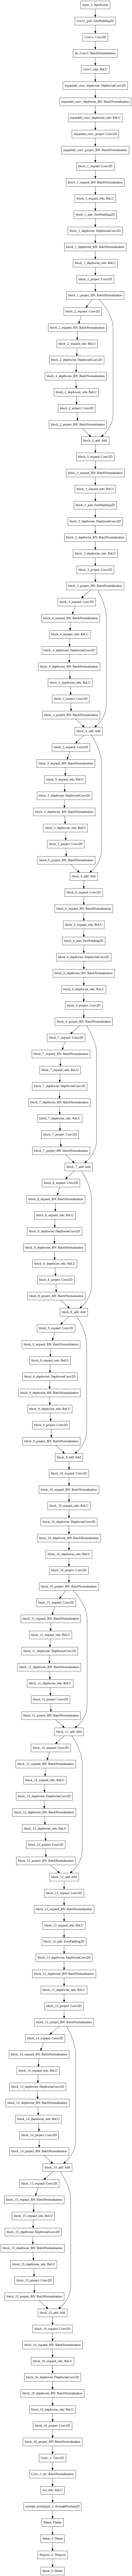

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)